In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
cd drive/My Drive/Project/Project_repeat_buyer

[Errno 2] No such file or directory: 'drive/My Drive/Project/Project_repeat_buyer'
/content/drive/My Drive/Project/Project_repeat_buyer


# Pipeline

In [0]:
import Pipeline
data = Pipeline.pipeline()
data

For this process, it takes approximately 30 minutes. So sit back quitely while the process goes....
############################################################################################
Preparing data from raw...
Approximately, it takes: 145 seconds
Time taken: 125.52576351165771
Done...
############################################################################################
Creating gender behavioural data...
Approximately, it takes: 120 seconds
Completed: 1 of 5...
Completed: 2 of 5...
Completed: 3 of 5...
Completed: 4 of 5...
Completed: 5 of 5...
Few moments more...
Done...
Time taken: 209.60966968536377 seconds
############################################################################################
Creating age_range behavioural data...
Approximately, it takes: 120 seconds
Completed: 1 of 5...
Completed: 2 of 5...
Completed: 3 of 5...
Completed: 4 of 5...
Completed: 5 of 5...
Few moments more...
Done...
Time taken: 209.90619230270386 seconds
#########################

/content/drive/My Drive/Project/Project_repeat_buyer/Utility.py:32: RuntimeWarning: invalid value encountered in double_scalars
  cos = dot / (norma * normb)


Completed: 13 of 13...
Done...
Time taken: 429.24982738494873 seconds
############################################################################################
Creating merchant behavioural data...
Merchant_normal_data...
Approximately, it takes: 300 seconds
Completed: 1 of 13...
Completed: 2 of 13...
Completed: 3 of 13...
Merchant_sales_data...
Completed: 4 of 13...
Completed: 5 of 13...
Completed: 6 of 13...
Merchant_other_related_data...
Completed: 7 of 13...
Completed: 8 of 13...
Completed: 9 of 13...
Completed: 10 of 13...
Completed: 11 of 13...
Completed: 12 of 13...
Completed: 13 of 13...
Done...
Time taken: 343.61800241470337 seconds
############################################################################################
############################################################################################
############################################################################################
####################################################################

,user_id,merchant_id,label,gender,age_range,#act_0_nor_U,#act_1_nor_U,#act_2_nor_U,#act_3_nor_U,tot_acts_nor_U,#brands_click_nor_U,#brands_pur_nor_U,#cats_click_nor_U,#cats_pur_nor_U,#items_click_nor_U,#items_pur_nor_U,#days_click_nor_U,#days_pur_nor_U,brands_p_c_ratio_nor_U,cats_p_c_ratio_nor_U,items_p_c_ratio_nor_U,days_p_c_ratio_nor_U,#act_0_sales_U,#act_1_sales_U,#act_2_sales_U,#act_3_sales_U,tot_acts_sales_U,#brands_click_sales_U,#brands_pur_sales_U,#cats_click_sales_U,#cats_pur_sales_U,#items_click_sales_U,#items_pur_sales_U,#days_click_sales_U,#days_pur_sales_U,brands_p_c_ratio_sales_U,cats_p_c_ratio_sales_U,items_p_c_ratio_sales_U,days_p_c_ratio_sales_U,#new_mer_U,...,items_p_c_ratio_UM,#days_click_UM,#days_pur_UM,#days_fav_UM,days_p_c_ratio_UM,act_0_last_7_30_days_UM,act_1_last_7_30_days_UM,act_2_last_7_30_days_UM,act_3_last_7_30_days_UM,tot_acts_last_7_30_days_UM,act_0_last_7_60_days_UM,act_1_last_7_60_days_UM,act_2_last_7_60_days_UM,act_3_last_7_60_days_UM,tot_acts_last_7_60_days_UM,act_0_last_7_180_days_UM,act_1_last_7_180_days_UM,act_2_last_7_180_days_UM,act_3_last_7_180_days_UM,tot_acts_last_7_180_days_UM,M_mkt_share_mean_C,M_user_share_mean_C,C_mkt_share_mean_M,C_user_share_mean_M,sim_score_mean_UMC,M_mkt_share_max_C,M_user_share_max_C,C_mkt_share_max_M,C_user_share_max_M,sim_score_max_UMC,M_mkt_share_mean_B,M_user_share_mean_B,B_mkt_share_mean_M,B_user_share_mean_M,sim_score_mean_UMB,M_mkt_share_max_B,M_user_share_max_B,B_mkt_share_max_M,B_user_share_max_M,sim_score_max_UMB
0,376517,2579,0.0,1,6,0.921875,0.000000,0.062500,0.015625,64.0,19.0,2.0,16.0,2.0,36.0,3.0,9.0,2.0,0.105263,0.125000,0.083333,0.222222,0.933333,0.0,0.066667,0.000000,15,2,1,2,1,4,1,2,1,0.500000,0.500000,0.250000,0.500000,1,...,0.333333,2,1,0,0.500000,1.000000,0.0,0.0,0.0,1.0000,1.000000,0.0,0.0,0.0,1.0000,1.000000,0.0,0.0,0.0,1.0000,0.292019,0.310351,0.769167,0.834738,0.997798,0.292019,0.310351,0.769167,0.834738,0.997798,0.522227,0.701685,0.997527,0.999745,0.997797,0.522227,0.701685,0.997527,0.999745,0.997797
1,47633,2579,0.0,0,5,0.765625,0.000000,0.039062,0.195312,128.0,34.0,5.0,21.0,5.0,57.0,5.0,23.0,4.0,0.147059,0.238095,0.087719,0.173913,0.884615,0.0,0.038462,0.076923,26,2,1,3,1,6,1,5,1,0.500000,0.333333,0.166667,0.200000,1,...,0.200000,5,1,1,0.200000,0.277778,0.0,0.0,0.0,0.2500,0.277778,0.0,0.0,0.0,0.2500,0.277778,0.0,0.0,0.0,0.2500,0.182267,0.183033,0.417972,0.442146,0.997451,0.292019,0.310351,0.769167,0.834738,0.998880,0.522227,0.701685,0.997527,0.999745,0.999418,0.522227,0.701685,0.997527,0.999745,0.999418
2,365987,2579,NaN,1,4,0.936170,0.000000,0.063830,0.000000,141.0,39.0,5.0,34.0,6.0,75.0,9.0,31.0,5.0,0.128205,0.176471,0.120000,0.161290,0.833333,0.0,0.100000,0.066667,30,5,3,6,3,10,3,6,1,0.600000,0.500000,0.300000,0.166667,1,...,0.200000,6,1,2,0.166667,0.857143,0.0,0.0,0.5,0.8125,0.857143,0.0,0.0,0.5,0.8125,0.857143,0.0,0.0,0.5,0.8125,0.182267,0.183033,0.417972,0.442146,0.992954,0.292019,0.310351,0.769167,0.834738,0.999065,0.522227,0.701685,0.997527,0.999745,0.999376,0.522227,0.701685,0.997527,0.999745,0.999376
3,108633,2579,0.0,0,5,0.921053,0.000000,0.035088,0.043860,114.0,18.0,2.0,27.0,4.0,78.0,4.0,21.0,2.0,0.111111,0.148148,0.051282,0.095238,0.250000,0.0,0.750000,0.000000,4,1,2,1,3,1,3,1,1,2.000000,3.000000,3.000000,1.000000,2,...,2.000000,1,1,0,1.000000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.249927,0.270571,0.304479,0.375394,0.848169,0.385246,0.445647,0.769167,0.834738,0.942861,0.522227,0.701685,0.997527,0.999745,0.989764,0.522227,0.701685,0.997527,0.999745,0.989764
4,24209,2579,NaN,0,3,0.808511,0.042553,0.127660,0.021277,47.0,14.0,3.0,16.0,3.0,29.0,5.0,13.0,3.0,0.214286,0.187500,0.172414,0.230769,0.933333,0.0,0.066667,0.000000,15,8,1,6,1,13,1,1,1,0.125000,0.166667,0.076923,1.000000,1,...,0.333333,1,1,0,1.000000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.292019,0.310351,0.769167,0.834738,0.986680,0.292019,0.310351,0.769167,0.834738,0.986680

# Preparing data from raw source

In [0]:
start_ = time.time()

# --------------------------------------------------------------------------------------------------------------------------------------------------- #
# ------------------------------------------------------------- PREPARING DATA FROM RAW ------------------------------------------------------------- #
# --------------------------------------------------------------------------------------------------------------------------------------------------- #

start = time.time()
print('Preparing data from raw...')
print('Approximately, it takes: 145 seconds')

# Preparaing user_log from data_format1
user_info = pd.read_csv('data_format1/user_info_format1.csv')
user_log = pd.read_csv('data_format1/user_log_format1.csv')
user_log = pd.merge(user_info,user_log,on='user_id')
del user_info
user_log = user_log.rename(columns={'seller_id':'merchant_id'})
user_log

# ---------------------------------------------------------------------------------------------------------------- #

# Preparing user-merchant-label triplet form format2
train_format_2 = pd.read_csv('data_format2/train_format2.csv')
test_format_2 = pd.read_csv('data_format2/test_format2.csv')
df = pd.concat([train_format_2,test_format_2])
del train_format_2
del test_format_2
df = df[['user_id','merchant_id','label']]
df

# ---------------------------------------------------------------------------------------------------------------- #

df = pd.merge(user_log,df,on=['user_id','merchant_id'])
del user_log
df

# ---------------------------------------------------------------------------------------------------------------- #

# Dealing with null values in forllowing columns
df.brand_id.fillna(0,inplace=True)
df.age_range.fillna(0,inplace=True)
df.gender.fillna(2,inplace=True)

# ---------------------------------------------------------------------------------------------------------------- #

# Adding more columns which are going to be used in analysis/feature generation
# Date/Month column
df['month']=df.time_stamp//100
df['day'] = df.time_stamp%100

# Age_gender column formation
df['age_range'] = df['age_range'].astype(int)
df['gender'] = df['gender'].astype(int)
# Age_gender
df['age_gender'] = df['age_range'] + (0.1 * df['gender'])

# # Old pair reflects that u-m pair which had continued their trade even on sales day.
df['old_um'] = [1 if x == -1 else 0 for x in df.label]


############################################################################################
############################################################################################
# Normal day data/Sales day data
nor_data = df[(df.label==-1) & (df.time_stamp!=1111)]
sales_data = df[(df.label!=-1) | ((df.label==-1) & (df.time_stamp==1111))]

print('Time taken:',time.time()-start)
print('Done...')
print('############################################################################################')
# df


# --------------------------------------------------------------------------------------------------------------------------------------------------- #
# --------------------------------------------------- PREPARING DATA THAT WILL GO INTO THE MODEL ---------------------------------------------------- #
# --------------------------------------------------------------------------------------------------------------------------------------------------- #

from FeatureEnggScripts import gender
print('Creating gender behavioural data...')
gender = gender.gender(df,nor_data,sales_data)
print('############################################################################################')
# gender

# ---------------------------------------------------------------------------------------------------- #

from FeatureEnggScripts import age_range
print('Creating age_range behavioural data...')
age_range = age_range.age_range(df,nor_data,sales_data)
print('############################################################################################')
# age_range

# ---------------------------------------------------------------------------------------------------- #
# ---------------------------------------------------------------------------------------------------- #
# ---------------------------------------------------------------------------------------------------- #

from FeatureEnggScripts import user
print('Creating user behavioural data...')
# Adding gender/age of the user
user_info = df[['user_id','gender','age_range']].drop_duplicates()
# user_info
user = user.user(df,nor_data,sales_data)

# Merging gender/age raleated data with user
user = pd.merge(user_info,user,on='user_id')
user = pd.merge(user,gender,on='gender')
user = pd.merge(user,age_range,on='age_range')
del gender
del age_range
print('############################################################################################')
# user

# ---------------------------------------------------------------------------------------------------- #

from FeatureEnggScripts import merchant
print('Creating merchant behavioural data...')
merchant = merchant.merchant(df,nor_data,sales_data)
print('############################################################################################')
# merchant

# ---------------------------------------------------------------------------------------------------- #
# ---------------------------------------------------------------------------------------------------- #
# ---------------------------------------------------------------------------------------------------- #

print('############################################################################################')
print('############################################################################################')
print('############################################################################################')

print('Preparing User-Merchant pair wise information...')
print('Approximately: it takes 1500 seconds')
start = time.time()

# ------------------------------------------------------------------------------------------------------------ #

from FeatureEnggScripts import mer_cat
print('Creating merchant-cat related data...')
mer_cat = mer_cat.mer_cat(df)
# mer_cat
mer_cat['#act_0_MC'] = mer_cat['#act_0_MC']/mer_cat['tot_acts_MC']
mer_cat['#act_1_MC'] = mer_cat['#act_1_MC']/mer_cat['tot_acts_MC']
mer_cat['#act_2_MC'] = mer_cat['#act_2_MC']/mer_cat['tot_acts_MC']
mer_cat['#act_3_MC'] = mer_cat['#act_3_MC']/mer_cat['tot_acts_MC']
print('############################################################################################')
# mer_cat

from FeatureEnggScripts import mer_brand
print('Creating merchant-brand related data...')
mer_brand = mer_brand.mer_brand(df)
# mer_brand
mer_brand['#act_0_MB'] = mer_brand['#act_0_MB']/mer_brand['tot_acts_MB']
mer_brand['#act_1_MB'] = mer_brand['#act_1_MB']/mer_brand['tot_acts_MB']
mer_brand['#act_2_MB'] = mer_brand['#act_2_MB']/mer_brand['tot_acts_MB']
mer_brand['#act_3_MB'] = mer_brand['#act_3_MB']/mer_brand['tot_acts_MB']
print('############################################################################################')
# mer_brand

# ------------------------------------------------------------------------------------------------------------- #

from FeatureEnggScripts import user_cat
print('Creating user-cat related data...')
user_cat = user_cat.user_cat(df)
# user_cat
user_cat['#act_0_UC'] = user_cat['#act_0_UC']/user_cat['tot_acts_UC']
user_cat['#act_1_UC'] = user_cat['#act_1_UC']/user_cat['tot_acts_UC']
user_cat['#act_2_UC'] = user_cat['#act_2_UC']/user_cat['tot_acts_UC']
user_cat['#act_3_UC'] = user_cat['#act_3_UC']/user_cat['tot_acts_UC']
print('############################################################################################')
# user_cat

from FeatureEnggScripts import user_brand
print('Creating user-brand related data...')
user_brand = user_brand.user_brand(df)
# user_brand
user_brand['#act_0_UB'] = user_brand['#act_0_UB']/user_brand['tot_acts_UB']
user_brand['#act_1_UB'] = user_brand['#act_1_UB']/user_brand['tot_acts_UB']
user_brand['#act_2_UB'] = user_brand['#act_2_UB']/user_brand['tot_acts_UB']
user_brand['#act_3_UB'] = user_brand['#act_3_UB']/user_brand['tot_acts_UB']
print('############################################################################################')
# user_brand

# ------------------------------------------------------------------------------------------------------------- #
# ------------------------------------------------------------------------------------------------------------- #
# ------------------------------------------------------------------------------------------------------------- #
# ------------------------------------------------------------------------------------------------------------- #

um = df[df.label!=-1][['user_id','merchant_id','label']].drop_duplicates()

# User_Merchant_Cat
print('User-Merchant-Category...')
umc = pd.merge(um[['user_id','merchant_id']],user_cat,on='user_id')
umc = pd.merge(umc,mer_cat,on=['merchant_id','cat_id'])
umc.drop(['#days_click_UC','#days_pur_UC', '#buyers_MC'],axis=1,inplace=True)
umc['sim_score_UMC'] = umc.apply(lambda x: sim_score(np.array(x[3:8]),np.array(x[8:13])),axis=1)
# umc.to_csv('Data/umc_with_sim_score_without_agg.csv',index=False)
# umc = pd.read_csv('data/umc_with_sim_score_without_agg.csv')
umc1 = umc.groupby(['user_id','merchant_id']).agg({'M_mkt_share_C':'mean','M_user_share_C':'mean',\
                    'C_mkt_share_M':'mean', 'C_user_share_M':'mean','sim_score_UMC':'mean'}).\
                    rename(columns={'M_mkt_share_C':'M_mkt_share_mean_C','M_user_share_C':'M_user_share_mean_C',\
                    'C_mkt_share_M':'C_mkt_share_mean_M', 'C_user_share_M':'C_user_share_mean_M',\
                    'sim_score_UMC':'sim_score_mean_UMC'}).reset_index()
umc2 = umc.groupby(['user_id','merchant_id']).agg({'M_mkt_share_C':'max','M_user_share_C':'max',\
                    'C_mkt_share_M':'max', 'C_user_share_M':'max','sim_score_UMC':'max'}).\
                    rename(columns={'M_mkt_share_C':'M_mkt_share_max_C','M_user_share_C':'M_user_share_max_C',\
                    'C_mkt_share_M':'C_mkt_share_max_M', 'C_user_share_M':'C_user_share_max_M',\
                    'sim_score_UMC':'sim_score_max_UMC'}).reset_index()
umc = pd.merge(umc1,umc2,on=['user_id','merchant_id'])
print('############################################################################################')
# umc

# User_Merchant_Brand
print('User-Merchant-Brand...')
umb = pd.merge(um[['user_id','merchant_id']],user_brand,on='user_id')
umb = pd.merge(umb,mer_brand,on=['merchant_id','brand_id'])
umb.drop(['#days_click_UB','#days_pur_UB', '#buyers_MB'],axis=1,inplace=True)

umb['sim_score_UMB'] = umb.apply(lambda x: sim_score(np.array(x[3:8]),np.array(x[8:13])),axis=1)
# umb.to_csv('Data/umb_with_sim_score_without_agg.csv',index=False)
# umb = pd.read_csv('data/umb_with_sim_score_without_agg.csv')
umb1 = umb.groupby(['user_id','merchant_id']).agg({'M_mkt_share_B':'mean','M_user_share_B':'mean',\
                    'B_mkt_share_M':'mean', 'B_user_share_M':'mean','sim_score_UMB':'mean'}).\
                    rename(columns={'M_mkt_share_B':'M_mkt_share_mean_B','M_user_share_B':'M_user_share_mean_B',\
                    'B_mkt_share_M':'B_mkt_share_mean_M', 'B_user_share_M':'B_user_share_mean_M',\
                    'sim_score_UMB':'sim_score_mean_UMB'}).reset_index()
umb2 = umb.groupby(['user_id','merchant_id']).agg({'M_mkt_share_B':'max','M_user_share_B':'max',\
                    'B_mkt_share_M':'max', 'B_user_share_M':'max','sim_score_UMB':'max'}).\
                    rename(columns={'M_mkt_share_B':'M_mkt_share_max_B','M_user_share_B':'M_user_share_max_B',\
                    'B_mkt_share_M':'B_mkt_share_max_M', 'B_user_share_M':'B_user_share_max_M',\
                    'sim_score_UMB':'sim_score_max_UMB'}).reset_index()
umb = pd.merge(umb1,umb2,on=['user_id','merchant_id'])
print('############################################################################################')
# umb

# ------------------------------------------------------------------------------------------------------------- #

print('Little more time...')
umbc = pd.merge(umc,umb,on=['user_id','merchant_id'])
# umbc.to_csv('data/umbc.csv',index=False)
del umc
del umb
del user_brand
del user_cat
del mer_cat
del mer_brand
# umbc 

############################################################################################################
############################################################################################################

# User-merchant pair actions related data
from FeatureEnggScripts import user_mer
user_mer = user_mer.user_mer(df)
# user_mer

user_mer = pd.merge(user_mer,umbc,on=['user_id','merchant_id'])
del umbc
# user_mer

############################################################################################################
############################################################################################################


# --------------------------------------------------------------------------------------------------------------------------------------------------- #
# -------------------------------------------------------------- PREPARING FINAL DATA --------------------------------------------------------------- #
# --------------------------------------------------------------------------------------------------------------------------------------------------- #

data = pd.merge(um,user,on='user_id')
data = pd.merge(data,merchant,on='merchant_id')
data = pd.merge(data,user_mer,on=['user_id','merchant_id'])
del user
del merchant
del user_mer

print('############################################################################################')
print('############################################################################################')
print('Overall time taken:',time.time()-start_)
print('############################################################################################')
print('############################################################################################')

data

Preparing data from raw...
Approximately, it takes: 145 seconds
Time taken: 146.0634160041809
Preparing data from raw...
############################################################################################


,user_id,age_range,gender,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,label,month,day,age_gender,old_um
0,376517,6,1,285645,1188,547,4905.0,1031,0,-1.0,10,31,6.1,1
1,376517,6,1,587300,1188,547,4905.0,1031,0,-1.0,10,31,6.1,1
2,376517,6,1,84156,1188,547,4905.0,1031,0,-1.0,10,31,6.1,1
3,376517,6,1,587300,1188,547,4905.0,1031,3,-1.0,10,31,6.1,1
4,376517,6,1,285645,1188,547,4905.0,1031,0,-1.0,10,31,6.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54925325,18031,3,1,122201,1344,926,26.0,1110,0,0.0,11,10,3.1,0
54925326,18031,3,1,122201,1344,926,26.0,1110,0,0.0,11,10,3.1,0
54925327,18031,3,1,122201,1344,926,26.0,1110,0,0.0,11,10,3.1,0
54925328,18031,3,1,122201,1344,926,26.0,1110,0,0.0,11,10,3.1,0


# Start

In [0]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from Utility import *

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
user = pd.read_csv('Data/user.csv')
merchant = pd.read_csv('Data/merchant.csv')
user_mer = pd.read_csv('Data/user_mer.csv')
um = pd.read_csv('Data/um.csv')

# Filling missing values
user.fillna(0,inplace=True)
merchant.fillna(0,inplace=True)

data = pd.merge(um,user,on='user_id')
data = pd.merge(data,merchant,on='merchant_id')
data = pd.merge(data,user_mer,on=['user_id','merchant_id'])
del user
del merchant
del user_mer
del um

temp = data.copy(deep=True)

data

,user_id,merchant_id,label,gender,age_range,#act_0_nor_U,#act_1_nor_U,#act_2_nor_U,#act_3_nor_U,tot_acts_nor_U,#brands_click_nor_U,#brands_pur_nor_U,#cats_click_nor_U,#cats_pur_nor_U,#items_click_nor_U,#items_pur_nor_U,#days_click_nor_U,#days_pur_nor_U,brands_p_c_ratio_nor_U,cats_p_c_ratio_nor_U,items_p_c_ratio_nor_U,days_p_c_ratio_nor_U,#act_0_sales_U,#act_1_sales_U,#act_2_sales_U,#act_3_sales_U,tot_acts_sales_U,#brands_click_sales_U,#brands_pur_sales_U,#cats_click_sales_U,#cats_pur_sales_U,#items_click_sales_U,#items_pur_sales_U,#days_click_sales_U,#days_pur_sales_U,brands_p_c_ratio_sales_U,cats_p_c_ratio_sales_U,items_p_c_ratio_sales_U,days_p_c_ratio_sales_U,#new_mer_U,...,items_p_c_ratio_UM,#days_click_UM,#days_pur_UM,#days_fav_UM,days_p_c_ratio_UM,act_0_last_7_30_days_UM,act_1_last_7_30_days_UM,act_2_last_7_30_days_UM,act_3_last_7_30_days_UM,tot_acts_last_7_30_days_UM,act_0_last_7_60_days_UM,act_1_last_7_60_days_UM,act_2_last_7_60_days_UM,act_3_last_7_60_days_UM,tot_acts_last_7_60_days_UM,act_0_last_7_180_days_UM,act_1_last_7_180_days_UM,act_2_last_7_180_days_UM,act_3_last_7_180_days_UM,tot_acts_last_7_180_days_UM,M_mkt_share_mean_C,M_user_share_mean_C,C_mkt_share_mean_M,C_user_share_mean_M,sim_score_mean_UMC,M_mkt_share_max_C,M_user_share_max_C,C_mkt_share_max_M,C_user_share_max_M,sim_score_max_UMC,M_mkt_share_mean_B,M_user_share_mean_B,B_mkt_share_mean_M,B_user_share_mean_M,sim_score_mean_UMB,M_mkt_share_max_B,M_user_share_max_B,B_mkt_share_max_M,B_user_share_max_M,sim_score_max_UMB
0,376517,2579,0.0,1,6,0.921875,0.000000,0.062500,0.015625,64.0,19.0,2.0,16.0,2.0,36.0,3.0,9.0,2.0,0.105263,0.125000,0.083333,0.222222,0.933333,0.0,0.066667,0.000000,15,2,1,2,1,4,1,2,1,0.500000,0.500000,0.250000,0.500000,1,...,0.333333,2,1,0,0.500000,1.000000,0.0,0.0,0.0,1.0000,1.000000,0.0,0.0,0.0,1.0000,1.000000,0.0,0.0,0.0,1.0000,0.292019,0.310351,0.769167,0.834738,0.997798,0.292019,0.310351,0.769167,0.834738,0.997798,0.522227,0.701685,0.997527,0.999745,0.997797,0.522227,0.701685,0.997527,0.999745,0.997797
1,47633,2579,0.0,0,5,0.765625,0.000000,0.039062,0.195312,128.0,34.0,5.0,21.0,5.0,57.0,5.0,23.0,4.0,0.147059,0.238095,0.087719,0.173913,0.884615,0.0,0.038462,0.076923,26,2,1,3,1,6,1,5,1,0.500000,0.333333,0.166667,0.200000,1,...,0.200000,5,1,1,0.200000,0.277778,0.0,0.0,0.0,0.2500,0.277778,0.0,0.0,0.0,0.2500,0.277778,0.0,0.0,0.0,0.2500,0.182267,0.183033,0.417972,0.442146,0.997451,0.292019,0.310351,0.769167,0.834738,0.998880,0.522227,0.701685,0.997527,0.999745,0.999418,0.522227,0.701685,0.997527,0.999745,0.999418
2,365987,2579,NaN,1,4,0.936170,0.000000,0.063830,0.000000,141.0,39.0,5.0,34.0,6.0,75.0,9.0,31.0,5.0,0.128205,0.176471,0.120000,0.161290,0.833333,0.0,0.100000,0.066667,30,5,3,6,3,10,3,6,1,0.600000,0.500000,0.300000,0.166667,1,...,0.200000,6,1,2,0.166667,0.857143,0.0,0.0,0.5,0.8125,0.857143,0.0,0.0,0.5,0.8125,0.857143,0.0,0.0,0.5,0.8125,0.182267,0.183033,0.417972,0.442146,0.992954,0.292019,0.310351,0.769167,0.834738,0.999065,0.522227,0.701685,0.997527,0.999745,0.999376,0.522227,0.701685,0.997527,0.999745,0.999376
3,108633,2579,0.0,0,5,0.921053,0.000000,0.035088,0.043860,114.0,18.0,2.0,27.0,4.0,78.0,4.0,21.0,2.0,0.111111,0.148148,0.051282,0.095238,0.250000,0.0,0.750000,0.000000,4,1,2,1,3,1,3,1,1,2.000000,3.000000,3.000000,1.000000,2,...,2.000000,1,1,0,1.000000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.249927,0.270571,0.304479,0.375394,0.848169,0.385246,0.445647,0.769167,0.834738,0.942861,0.522227,0.701685,0.997527,0.999745,0.989764,0.522227,0.701685,0.997527,0.999745,0.989764
4,24209,2579,NaN,0,3,0.808511,0.042553,0.127660,0.021277,47.0,14.0,3.0,16.0,3.0,29.0,5.0,13.0,3.0,0.214286,0.187500,0.172414,0.230769,0.933333,0.0,0.066667,0.000000,15,8,1,6,1,13,1,1,1,0.125000,0.166667,0.076923,1.000000,1,...,0.333333,1,1,0,1.000000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.292019,0.310351,0.769167,0.834738,0.986680,0.292019,0.310351,0.769167,0.834738,0.986680

# One Hot Encodeing of Gender/Age_range

In [0]:
encoder = data[['user_id','merchant_id','gender','age_range']]
encoder1 = np.array(encoder[['gender','age_range']])
print(len(encoder1))
# encoder1
enc = OneHotEncoder(sparse=False)
encoder1 = enc.fit_transform(encoder1)
encoder1 = pd.DataFrame(encoder1)
# encoder1
encoder1 = encoder[['user_id','merchant_id']].join(encoder1)
encoder1

data = pd.merge(encoder1,data,on=['user_id','merchant_id'])
del encoder
del encoder1
data

522341


,user_id,merchant_id,0,1,2,3,4,5,6,7,8,9,10,11,label,gender,age_range,#act_0_nor_U,#act_1_nor_U,#act_2_nor_U,#act_3_nor_U,tot_acts_nor_U,#brands_click_nor_U,#brands_pur_nor_U,#cats_click_nor_U,#cats_pur_nor_U,#items_click_nor_U,#items_pur_nor_U,#days_click_nor_U,#days_pur_nor_U,brands_p_c_ratio_nor_U,cats_p_c_ratio_nor_U,items_p_c_ratio_nor_U,days_p_c_ratio_nor_U,#act_0_sales_U,#act_1_sales_U,#act_2_sales_U,#act_3_sales_U,tot_acts_sales_U,#brands_click_sales_U,...,items_p_c_ratio_UM,#days_click_UM,#days_pur_UM,#days_fav_UM,days_p_c_ratio_UM,act_0_last_7_30_days_UM,act_1_last_7_30_days_UM,act_2_last_7_30_days_UM,act_3_last_7_30_days_UM,tot_acts_last_7_30_days_UM,act_0_last_7_60_days_UM,act_1_last_7_60_days_UM,act_2_last_7_60_days_UM,act_3_last_7_60_days_UM,tot_acts_last_7_60_days_UM,act_0_last_7_180_days_UM,act_1_last_7_180_days_UM,act_2_last_7_180_days_UM,act_3_last_7_180_days_UM,tot_acts_last_7_180_days_UM,M_mkt_share_mean_C,M_user_share_mean_C,C_mkt_share_mean_M,C_user_share_mean_M,sim_score_mean_UMC,M_mkt_share_max_C,M_user_share_max_C,C_mkt_share_max_M,C_user_share_max_M,sim_score_max_UMC,M_mkt_share_mean_B,M_user_share_mean_B,B_mkt_share_mean_M,B_user_share_mean_M,sim_score_mean_UMB,M_mkt_share_max_B,M_user_share_max_B,B_mkt_share_max_M,B_user_share_max_M,sim_score_max_UMB
0,376517,2579,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,6,0.921875,0.000000,0.062500,0.015625,64.0,19.0,2.0,16.0,2.0,36.0,3.0,9.0,2.0,0.105263,0.125000,0.083333,0.222222,0.933333,0.0,0.066667,0.000000,15,2,...,0.333333,2,1,0,0.500000,1.000000,0.0,0.0,0.0,1.0000,1.000000,0.0,0.0,0.0,1.0000,1.000000,0.0,0.0,0.0,1.0000,0.292019,0.310351,0.769167,0.834738,0.997798,0.292019,0.310351,0.769167,0.834738,0.997798,0.522227,0.701685,0.997527,0.999745,0.997797,0.522227,0.701685,0.997527,0.999745,0.997797
1,47633,2579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,5,0.765625,0.000000,0.039062,0.195312,128.0,34.0,5.0,21.0,5.0,57.0,5.0,23.0,4.0,0.147059,0.238095,0.087719,0.173913,0.884615,0.0,0.038462,0.076923,26,2,...,0.200000,5,1,1,0.200000,0.277778,0.0,0.0,0.0,0.2500,0.277778,0.0,0.0,0.0,0.2500,0.277778,0.0,0.0,0.0,0.2500,0.182267,0.183033,0.417972,0.442146,0.997451,0.292019,0.310351,0.769167,0.834738,0.998880,0.522227,0.701685,0.997527,0.999745,0.999418,0.522227,0.701685,0.997527,0.999745,0.999418
2,365987,2579,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1,4,0.936170,0.000000,0.063830,0.000000,141.0,39.0,5.0,34.0,6.0,75.0,9.0,31.0,5.0,0.128205,0.176471,0.120000,0.161290,0.833333,0.0,0.100000,0.066667,30,5,...,0.200000,6,1,2,0.166667,0.857143,0.0,0.0,0.5,0.8125,0.857143,0.0,0.0,0.5,0.8125,0.857143,0.0,0.0,0.5,0.8125,0.182267,0.183033,0.417972,0.442146,0.992954,0.292019,0.310351,0.769167,0.834738,0.999065,0.522227,0.701685,0.997527,0.999745,0.999376,0.522227,0.701685,0.997527,0.999745,0.999376
3,108633,2579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,5,0.921053,0.000000,0.035088,0.043860,114.0,18.0,2.0,27.0,4.0,78.0,4.0,21.0,2.0,0.111111,0.148148,0.051282,0.095238,0.250000,0.0,0.750000,0.000000,4,1,...,2.000000,1,1,0,1.000000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.249927,0.270571,0.304479,0.375394,0.848169,0.385246,0.445647,0.769167,0.834738,0.942861,0.522227,0.701685,0.997527,0.999745,0.989764,0.522227,0.701685,0.997527,0.999745,0.989764
4,24209,2579,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0,3,0.808511,0.042553,0.127660,0.021277,47.0,14.0,3.0,16.0,3.0,29.0,5.0,13.0,3.0,0.214286,0.187500,0.172414,0.230769,0.933333,0.0,0.066667,0.000000,15,8,...,0.333333,1,1,0,1.000000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.292019,0.310351,0.769167,0.834738,0.986680,0.292019,0.310351,0.769167,0.834738,0.986680,0.261217,0.351122,0.500000,0.502427,0.948136,0.522227,0.701685,0.997527,0.999745,0.986678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# Train/Test data & data for cross validation along with scaling

In [0]:
predictors = [x for x in data.columns if x not in ['user_id', 'gender', 'age_range', 'merchant_id','label']]
target = [x for x in data.columns if x in ['label']]

Train = data[(data.label==0) | (data.label==1)]
Test = data[(data.label!=0) & (data.label!=1)]
Train

,user_id,merchant_id,0,1,2,3,4,5,6,7,8,9,10,11,label,gender,age_range,#act_0_nor_U,#act_1_nor_U,#act_2_nor_U,#act_3_nor_U,tot_acts_nor_U,#brands_click_nor_U,#brands_pur_nor_U,#cats_click_nor_U,#cats_pur_nor_U,#items_click_nor_U,#items_pur_nor_U,#days_click_nor_U,#days_pur_nor_U,brands_p_c_ratio_nor_U,cats_p_c_ratio_nor_U,items_p_c_ratio_nor_U,days_p_c_ratio_nor_U,#act_0_sales_U,#act_1_sales_U,#act_2_sales_U,#act_3_sales_U,tot_acts_sales_U,#brands_click_sales_U,...,items_p_c_ratio_UM,#days_click_UM,#days_pur_UM,#days_fav_UM,days_p_c_ratio_UM,act_0_last_7_30_days_UM,act_1_last_7_30_days_UM,act_2_last_7_30_days_UM,act_3_last_7_30_days_UM,tot_acts_last_7_30_days_UM,act_0_last_7_60_days_UM,act_1_last_7_60_days_UM,act_2_last_7_60_days_UM,act_3_last_7_60_days_UM,tot_acts_last_7_60_days_UM,act_0_last_7_180_days_UM,act_1_last_7_180_days_UM,act_2_last_7_180_days_UM,act_3_last_7_180_days_UM,tot_acts_last_7_180_days_UM,M_mkt_share_mean_C,M_user_share_mean_C,C_mkt_share_mean_M,C_user_share_mean_M,sim_score_mean_UMC,M_mkt_share_max_C,M_user_share_max_C,C_mkt_share_max_M,C_user_share_max_M,sim_score_max_UMC,M_mkt_share_mean_B,M_user_share_mean_B,B_mkt_share_mean_M,B_user_share_mean_M,sim_score_mean_UMB,M_mkt_share_max_B,M_user_share_max_B,B_mkt_share_max_M,B_user_share_max_M,sim_score_max_UMB
0,376517,2579,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,6,0.921875,0.00,0.062500,0.015625,64.0,19.0,2.0,16.0,2.0,36.0,3.0,9.0,2.0,0.105263,0.125000,0.083333,0.222222,0.933333,0.0,0.066667,0.000000,15,2,...,0.333333,2,1,0,0.5,1.000000,0.0,0.0,0.0,1.00,1.000000,0.0,0.0,0.0,1.00,1.000000,0.0,0.0,0.0,1.00,0.292019,0.310351,0.769167,0.834738,0.997798,0.292019,0.310351,0.769167,0.834738,0.997798,0.522227,0.701685,0.997527,0.999745,0.997797,0.522227,0.701685,0.997527,0.999745,0.997797
1,47633,2579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,5,0.765625,0.00,0.039062,0.195312,128.0,34.0,5.0,21.0,5.0,57.0,5.0,23.0,4.0,0.147059,0.238095,0.087719,0.173913,0.884615,0.0,0.038462,0.076923,26,2,...,0.200000,5,1,1,0.2,0.277778,0.0,0.0,0.0,0.25,0.277778,0.0,0.0,0.0,0.25,0.277778,0.0,0.0,0.0,0.25,0.182267,0.183033,0.417972,0.442146,0.997451,0.292019,0.310351,0.769167,0.834738,0.998880,0.522227,0.701685,0.997527,0.999745,0.999418,0.522227,0.701685,0.997527,0.999745,0.999418
3,108633,2579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,5,0.921053,0.00,0.035088,0.043860,114.0,18.0,2.0,27.0,4.0,78.0,4.0,21.0,2.0,0.111111,0.148148,0.051282,0.095238,0.250000,0.0,0.750000,0.000000,4,1,...,2.000000,1,1,0,1.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.249927,0.270571,0.304479,0.375394,0.848169,0.385246,0.445647,0.769167,0.834738,0.942861,0.522227,0.701685,0.997527,0.999745,0.989764,0.522227,0.701685,0.997527,0.999745,0.989764
5,398454,2579,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,4,1.000000,0.00,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.750000,0.0,0.250000,0.000000,12,2,...,0.400000,2,1,0,0.5,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.249927,0.270571,0.304479,0.375394,0.964769,0.385246,0.445647,0.769167,0.834738,0.981063,0.522227,0.701685,0.997527,0.999745,0.996620,0.522227,0.701685,0.997527,0.999745,0.996620
6,1016,2579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,6,0.885714,0.00,0.085714,0.028571,35.0,5.0,1.0,5.0,2.0,13.0,2.0,4.0,2.0,0.200000,0.400000,0.153846,0.500000,0.916667,0.0,0.083333,0.000000,12,1,...,0.250000,1,1,0,1.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.292019,0.310351,0.769167,0.834738,0.997075,0.292019,0.310351,0.769167,0.834738,0.997075,0.522227,0.701685,0.997527,0.999745,0.997074,0.522227,0.701685,0.997527,0.999745,0.997074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [0]:
Test

,user_id,merchant_id,0,1,2,3,4,5,6,7,8,9,10,11,label,gender,age_range,#act_0_nor_U,#act_1_nor_U,#act_2_nor_U,#act_3_nor_U,tot_acts_nor_U,#brands_click_nor_U,#brands_pur_nor_U,#cats_click_nor_U,#cats_pur_nor_U,#items_click_nor_U,#items_pur_nor_U,#days_click_nor_U,#days_pur_nor_U,brands_p_c_ratio_nor_U,cats_p_c_ratio_nor_U,items_p_c_ratio_nor_U,days_p_c_ratio_nor_U,#act_0_sales_U,#act_1_sales_U,#act_2_sales_U,#act_3_sales_U,tot_acts_sales_U,#brands_click_sales_U,...,items_p_c_ratio_UM,#days_click_UM,#days_pur_UM,#days_fav_UM,days_p_c_ratio_UM,act_0_last_7_30_days_UM,act_1_last_7_30_days_UM,act_2_last_7_30_days_UM,act_3_last_7_30_days_UM,tot_acts_last_7_30_days_UM,act_0_last_7_60_days_UM,act_1_last_7_60_days_UM,act_2_last_7_60_days_UM,act_3_last_7_60_days_UM,tot_acts_last_7_60_days_UM,act_0_last_7_180_days_UM,act_1_last_7_180_days_UM,act_2_last_7_180_days_UM,act_3_last_7_180_days_UM,tot_acts_last_7_180_days_UM,M_mkt_share_mean_C,M_user_share_mean_C,C_mkt_share_mean_M,C_user_share_mean_M,sim_score_mean_UMC,M_mkt_share_max_C,M_user_share_max_C,C_mkt_share_max_M,C_user_share_max_M,sim_score_max_UMC,M_mkt_share_mean_B,M_user_share_mean_B,B_mkt_share_mean_M,B_user_share_mean_M,sim_score_mean_UMB,M_mkt_share_max_B,M_user_share_max_B,B_mkt_share_max_M,B_user_share_max_M,sim_score_max_UMB
2,365987,2579,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1,4,0.936170,0.000000,0.063830,0.000000,141.0,39.0,5.0,34.0,6.0,75.0,9.0,31.0,5.0,0.128205,0.176471,0.120000,0.161290,0.833333,0.0,0.100000,0.066667,30,5,...,0.200000,6,1,2,0.166667,0.857143,0.0,0.0,0.5,0.8125,0.857143,0.0,0.0,0.5,0.8125,0.857143,0.0,0.0,0.5,0.8125,0.182267,0.183033,0.417972,0.442146,0.992954,0.292019,0.310351,0.769167,0.834738,0.999065,0.522227,0.701685,0.997527,0.999745,0.999376,0.522227,0.701685,0.997527,0.999745,0.999376
4,24209,2579,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0,3,0.808511,0.042553,0.127660,0.021277,47.0,14.0,3.0,16.0,3.0,29.0,5.0,13.0,3.0,0.214286,0.187500,0.172414,0.230769,0.933333,0.0,0.066667,0.000000,15,8,...,0.333333,1,1,0,1.000000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.292019,0.310351,0.769167,0.834738,0.986680,0.292019,0.310351,0.769167,0.834738,0.986680,0.261217,0.351122,0.500000,0.502427,0.948136,0.522227,0.701685,0.997527,0.999745,0.986678
7,191712,2579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0,4,0.739130,0.000000,0.260870,0.000000,23.0,7.0,3.0,8.0,4.0,12.0,5.0,8.0,2.0,0.428571,0.500000,0.416667,0.250000,0.950000,0.0,0.050000,0.000000,40,8,...,0.333333,4,1,0,0.250000,1.000000,0.0,0.0,0.0,1.0000,1.000000,0.0,0.0,0.0,1.0000,1.000000,0.0,0.0,0.0,1.0000,0.292019,0.310351,0.769167,0.834738,0.998873,0.292019,0.310351,0.769167,0.834738,0.998873,0.522227,0.701685,0.997527,0.999745,0.998873,0.522227,0.701685,0.997527,0.999745,0.998873
8,48987,2579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0,4,0.555556,0.000000,0.000000,0.444444,9.0,4.0,0.0,4.0,0.0,5.0,0.0,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.666667,3,0,...,1.000000,0,1,1,1.000000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.292019,0.310351,0.769167,0.834738,0.970496,0.292019,0.310351,0.769167,0.834738,0.970496,0.522227,0.701685,0.997527,0.999745,0.970496,0.522227,0.701685,0.997527,0.999745,0.970496
9,86273,2579,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,6,0.857143,0.000000,0.000000,0.142857,49.0,9.0,0.0,11.0,0.0,24.0,0.0,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.869565,0.0,0.043478,0.086957,23,5,...,0.333333,2,1,1,0.500000,1.000000,0.0,0.0,1.0,1.0000,1.000000,0.0,0.0,1.0,1.0000,1.000000,0.0,0.0,1.0,1.0000,0.292019,0.310351,0.769167,0.834738,0.998535,0.292019,0.310351,0.769167,0.834738,0.998535,0.522227,0.701685,0.997527,0.999745,0.998534,0.522227,0.701685,0.997527,0.999745,0.998534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
miss(Train),miss(Test)

(Series([], dtype: int64), label    261477
 dtype: int64)

In [37]:
X = Train[predictors]
y = Train[target]
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X,columns=predictors)
X

,0,1,2,3,4,5,6,7,8,9,10,11,#act_0_nor_U,#act_1_nor_U,#act_2_nor_U,#act_3_nor_U,tot_acts_nor_U,#brands_click_nor_U,#brands_pur_nor_U,#cats_click_nor_U,#cats_pur_nor_U,#items_click_nor_U,#items_pur_nor_U,#days_click_nor_U,#days_pur_nor_U,brands_p_c_ratio_nor_U,cats_p_c_ratio_nor_U,items_p_c_ratio_nor_U,days_p_c_ratio_nor_U,#act_0_sales_U,#act_1_sales_U,#act_2_sales_U,#act_3_sales_U,tot_acts_sales_U,#brands_click_sales_U,#brands_pur_sales_U,#cats_click_sales_U,#cats_pur_sales_U,#items_click_sales_U,#items_pur_sales_U,...,items_p_c_ratio_UM,#days_click_UM,#days_pur_UM,#days_fav_UM,days_p_c_ratio_UM,act_0_last_7_30_days_UM,act_1_last_7_30_days_UM,act_2_last_7_30_days_UM,act_3_last_7_30_days_UM,tot_acts_last_7_30_days_UM,act_0_last_7_60_days_UM,act_1_last_7_60_days_UM,act_2_last_7_60_days_UM,act_3_last_7_60_days_UM,tot_acts_last_7_60_days_UM,act_0_last_7_180_days_UM,act_1_last_7_180_days_UM,act_2_last_7_180_days_UM,act_3_last_7_180_days_UM,tot_acts_last_7_180_days_UM,M_mkt_share_mean_C,M_user_share_mean_C,C_mkt_share_mean_M,C_user_share_mean_M,sim_score_mean_UMC,M_mkt_share_max_C,M_user_share_max_C,C_mkt_share_max_M,C_user_share_max_M,sim_score_max_UMC,M_mkt_share_mean_B,M_user_share_mean_B,B_mkt_share_mean_M,B_user_share_mean_M,sim_score_mean_UMB,M_mkt_share_max_B,M_user_share_max_B,B_mkt_share_max_M,B_user_share_max_M,sim_score_max_UMB
0,-1.445329,1.592750,-0.206753,-0.529138,-0.00706,-0.367411,-0.601872,-0.494376,-0.329998,3.319763,-0.126677,-0.052609,0.422472,-0.145561,-0.145119,-0.396988,-0.240481,-0.261676,-0.336603,-0.171381,-0.393775,-0.270761,-0.254825,-0.414466,-0.342045,-0.273880,-0.335213,-0.206253,-0.154735,0.700999,-0.126834,-0.605471,-0.369789,-0.387577,-0.733810,-0.764059,-0.770379,-0.756533,-0.623357,-0.728959,...,-0.809098,0.215370,0.0,-0.382433,-0.924864,1.554226,-0.099913,0.0,-0.331083,1.504930,1.580199,-0.099908,0.0,-0.329901,1.532090,1.625108,-0.099876,0.0,-0.32792,1.577908,2.401706,3.072028,1.496790,1.711353,1.108881,1.600590,2.135206,0.790759,0.961230,0.336184,-0.787193,-0.228116,0.564634,0.573245,0.634077,-1.154613,-0.459652,0.346387,0.355067,0.467261
1,0.691884,-0.627845,-0.206753,-0.529138,-0.00706,-0.367411,-0.601872,-0.494376,3.030320,-0.301226,-0.126677,-0.052609,-0.658586,-0.145561,-0.398708,1.249067,0.114421,0.187631,0.351583,0.118712,0.290057,-0.060301,0.067903,0.598128,0.133206,-0.140555,-0.000200,-0.190584,-0.277395,0.488136,-0.126834,-0.740546,0.534015,-0.175297,-0.733810,-0.764059,-0.603349,-0.756533,-0.527250,-0.728959,...,-1.142603,2.000938,0.0,1.156263,-1.921174,-0.063288,-0.099913,0.0,-0.331083,-0.156571,-0.052479,-0.099908,0.0,-0.329901,-0.145581,-0.033863,-0.099876,0.0,-0.32792,-0.127152,1.321645,1.582923,0.326951,0.348531,1.104150,1.600590,2.135206,0.790759,0.961230,0.354814,-0.787193,-0.228116,0.564634,0.573245,0.653180,-1.154613,-0.459652,0.346387,0.355067,0.488048
2,0.691884,-0.627845,-0.206753,-0.529138,-0.00706,-0.367411,-0.601872,-0.494376,3.030320,-0.301226,-0.126677,-0.052609,0.416782,-0.145561,-0.441714,-0.138341,0.036786,-0.291630,-0.336603,0.466824,0.062113,0.150159,-0.093461,0.453472,-0.342045,-0.255225,-0.266643,-0.320758,-0.477154,-2.284683,-0.126834,2.667020,-0.369789,-0.599856,-0.884612,-0.259805,-0.937409,0.102465,-0.767519,-0.074515,...,3.359706,-0.379819,0.0,-0.382433,0.735654,-0.685409,-0.099913,0.0,-0.331083,-0.710405,-0.680433,-0.099908,0.0,-0.329901,-0.704805,-0.671929,-0.099876,0.0,-0.32792,-0.695506,1.987480,2.606761,-0.051096,0.116813,-0.927837,2.305668,3.377487,0.790759,0.961230,-0.609735,-0.787193,-0.228116,0.564634,0.573245,0.539369,-1.154613,-0.459652,0.346387,0.355067,0.364202
3,-1.445329,1.592750,-0.206753,-0.529138,-0.00706,-0.367411,-0.601872,2.022750,-0.329998,-0.301226,-0.126677,-0.052609,0.963001,-0.145561,-0.821355,-0.540124,-0.589838,-0.800845,-0.795394,-1.041660,-0.849664,-0.621527,-0.738917,-0.993091,-0.817296,-0.609660,-0.705489,-0.503965,-0.718969,-0.100038,-0.126834,0.272514,-0.369789,-0.445471,-0.733810,-0.259805,-0.436318,0.102465,-0.527250,-0.

In [38]:
# Train/Test split 
X_train, X_test, y_train, y_test = train_test_split(Train[predictors],Train[target],test_size=0.3,random_state=123)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=predictors)
X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test,columns=predictors)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,#act_0_nor_U,#act_1_nor_U,#act_2_nor_U,#act_3_nor_U,tot_acts_nor_U,#brands_click_nor_U,#brands_pur_nor_U,#cats_click_nor_U,#cats_pur_nor_U,#items_click_nor_U,#items_pur_nor_U,#days_click_nor_U,#days_pur_nor_U,brands_p_c_ratio_nor_U,cats_p_c_ratio_nor_U,items_p_c_ratio_nor_U,days_p_c_ratio_nor_U,#act_0_sales_U,#act_1_sales_U,#act_2_sales_U,#act_3_sales_U,tot_acts_sales_U,#brands_click_sales_U,#brands_pur_sales_U,#cats_click_sales_U,#cats_pur_sales_U,#items_click_sales_U,#items_pur_sales_U,...,items_p_c_ratio_UM,#days_click_UM,#days_pur_UM,#days_fav_UM,days_p_c_ratio_UM,act_0_last_7_30_days_UM,act_1_last_7_30_days_UM,act_2_last_7_30_days_UM,act_3_last_7_30_days_UM,tot_acts_last_7_30_days_UM,act_0_last_7_60_days_UM,act_1_last_7_60_days_UM,act_2_last_7_60_days_UM,act_3_last_7_60_days_UM,tot_acts_last_7_60_days_UM,act_0_last_7_180_days_UM,act_1_last_7_180_days_UM,act_2_last_7_180_days_UM,act_3_last_7_180_days_UM,tot_acts_last_7_180_days_UM,M_mkt_share_mean_C,M_user_share_mean_C,C_mkt_share_mean_M,C_user_share_mean_M,sim_score_mean_UMC,M_mkt_share_max_C,M_user_share_max_C,C_mkt_share_max_M,C_user_share_max_M,sim_score_max_UMC,M_mkt_share_mean_B,M_user_share_mean_B,B_mkt_share_mean_M,B_user_share_mean_M,sim_score_mean_UMB,M_mkt_share_max_B,M_user_share_max_B,B_mkt_share_max_M,B_user_share_max_M,sim_score_max_UMB
0,0.690502,-0.626320,-0.207044,-0.530069,-0.007762,-0.366055,-0.602285,-0.494502,3.030650,-0.301068,-0.126633,-0.051871,-0.211392,-0.148747,-0.171096,0.462836,1.539478,1.321370,1.259998,1.449096,2.105762,1.689055,2.959659,1.755530,1.078104,-0.212163,0.168021,-0.149313,-0.197011,0.129630,-0.127711,-0.392919,0.645126,0.902738,0.470450,0.742322,2.061524,1.811706,0.907385,1.878755,...,-0.392916,1.393627,0.0,1.145408,-1.753034,-0.126900,-0.099505,0.0,-0.332104,-0.200714,-0.116446,-0.099499,0.0,-0.330918,-0.189942,-0.098907,-0.099468,0.0,-0.328917,-0.172248,3.306624,2.384386,2.140573,2.116189,1.130544,2.286693,1.587830,1.442667,1.384226,0.363657,-1.368076,-1.166627,0.481675,0.401986,0.643442,-1.803739,-1.485641,0.232433,0.124169,0.478040
1,0.690502,-0.626320,-0.207044,1.886547,-0.007762,-0.366055,-0.602285,-0.494502,-0.329962,-0.301068,-0.126633,-0.051871,-2.492941,-0.148747,4.581050,-0.538948,-0.589041,-0.800371,-0.563649,-1.041824,-0.620946,-0.624681,-0.576013,-0.994019,-0.578144,2.600506,2.242445,3.076793,1.812607,-1.192182,-0.127711,1.470327,-0.371068,-0.612459,-0.883842,-0.761460,-0.768935,-0.327932,-0.715922,-0.401716,...,0.855349,-0.378745,0.0,-0.381401,0.736137,-0.686443,-0.099505,0.0,-0.332104,-0.711617,-0.681323,-0.099499,0.0,-0.330918,-0.705892,-0.672855,-0.099468,0.0,-0.328917,-0.696623,0.313328,0.716174,-0.035222,0.534596,0.645016,0.267766,0.500703,-0.740997,-0.248228,0.110544,0.717017,0.711261,0.573626,0.572352,0.479489,0.531852,0.568498,0.359177,0.354139,0.299740
2,0.690502,-0.626320,-0.207044,-0.530069,-0.007762,-0.366055,1.660344,-0.494502,-0.329962,-0.301068,-0.126633,-0.051871,-0.420609,-0.148747,0.908501,-0.173535,-0.460548,-0.441767,-0.107737,-0.404612,0.060731,-0.473785,-0.093876,-0.342810,-0.104930,0.127830,0.279549,0.389664,0.042846,0.762851,-0.127711,-0.673107,-0.371068,0.056589,-0.432411,-0.761460,0.063553,-0.327932,0.286709,-0.401716,...,-1.378388,1.393627,0.0,-0.381401,-1.753034,1.207396,-0.099505,0.0,-0.332104,1.161694,1.230568,-0.099499,0.0,-0.330918,1.185923,1.010726,-0.099468,0.0,-0.328917,0.969724,-0.337801,-0.224587,-0.816303,-0.826000,-0.391780,-0.030546,0.827997,0.409131,-0.050814,0.358883,0.272406,0.305468,0.573626,0.573613,0.654595,0.033826,0.124620,0.359177,0.355841,0.490169
3,-1.448221,1.596629,-0.207044,1.886547,-0.007762,-0.366055,-0.602285,-0.494502,-0.329962,-0.301068,-0.126633,-0.051871,-0.305480,-0.148747,-0.099650,0.526839,-0.265014,-0.232581,-0.107737,-0.114970,-0.393720,-0.272591,-0.254588,0.163686,-0.104930,-0.131801,-0.355506,-0.207476,-0.269464,0.719725,-0.127711,-0.775550,-0.003605,-0.061478,-0.432411,-0.761460,-0.102945,-0.755859,0.095732,-0.727498,...

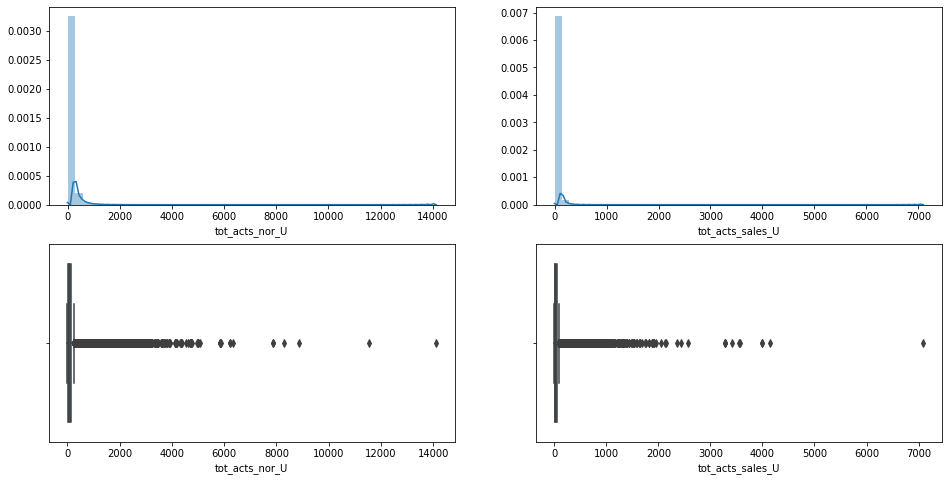

In [0]:
fig,ax = plt.subplots(2,2,figsize=(16,8))
sns.distplot(data['tot_acts_nor_U'],ax=ax[0][0])
sns.distplot(data['tot_acts_sales_U'],ax=ax[0][1])
sns.boxplot(data['tot_acts_nor_U'],ax=ax[1][0])
sns.boxplot(data['tot_acts_sales_U'],ax=ax[1][1])

In [0]:
IQR = data['tot_acts_nor_U'].quantile(0.75)-data['tot_acts_nor_U'].quantile(0.25)
upper_limit = data['tot_acts_nor_U'].quantile(0.75) + (IQR * 1.5)
upper_limit_extreme = data['tot_acts_nor_U'].quantile(0.75) + (IQR * 3)
IQR,upper_limit,upper_limit_extreme

(115.0, 312.5, 485.0)

In [0]:
total = np.float(data.shape[0])
print('Total borrowers: {}'.format(data['tot_acts_nor_U'].shape[0]/total))
print('Borrowers that earn > 178k: {}'.format(data[data['tot_acts_nor_U']>312.5].shape[0]/total))
print('Borrowers that earn > 256k: {}'.format(data[data['tot_acts_nor_U']>485].shape[0]/total))

Total borrowers: 1.0
Borrowers that earn > 178k: 0.09011671669791207
Borrowers that earn > 256k: 0.044185331344950535


# Running Logistic Regression
- Because of linear model, we have to scale the data

Model fit time: 98.45094299316406
Mean Train_AUC:  0.6842121395020504
Mean Test_AUC: 0.666877967548389
Best Train threshold=0.480989, G-Mean=0.635
Best Test threshold=0.468830, G-Mean=0.620



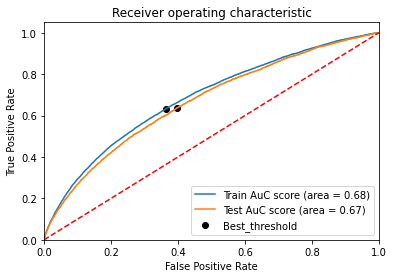

In [62]:
# Using train/test data
start = time.time()
logreg1 = LogisticRegression(class_weight='balanced',max_iter=2000,random_state=123)
logreg1.fit(X_train.values,y_train.values.ravel())
print('Model fit time:',time.time()-start)

# print('---------------- Test report ----------------')
# roc_auc(X_test,y_test,logreg1.predict(X_test),logreg1)
# print('---------------- Train report ----------------')
# roc_auc(X_train,y_train,logreg1.predict(X_train),logreg1)
print('Mean Train_AUC: ',roc_auc_score(y_train, logreg1.predict_proba(X_train)[:,1]))
print('Mean Test_AUC:',roc_auc_score(y_test, logreg1.predict_proba(X_test)[:,1]))
compare_train_test_AUC(X_train,y_train,X_test,y_test,logreg1)

## Logistic Regression CV

In [0]:
? LogisticRegressionCV

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  7.9min remaining: 11.9min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed: 10.1min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed: 10.1min finished


Model fit time: 611.109512090683
Mean AUC: 0.6740641946602366
Best Train threshold=0.494376, G-Mean=0.629
Best Test threshold=0.475725, G-Mean=0.621



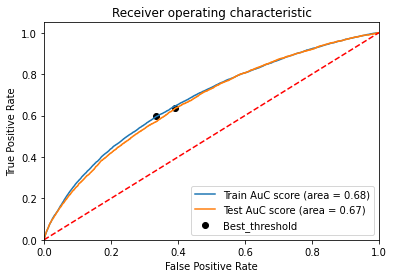

In [66]:
# Using Cross validation
start = time.time()
logregCV = LogisticRegressionCV(class_weight='balanced',scoring='roc_auc',verbose=2,max_iter=5000,random_state=123,n_jobs=5,cv=5)
logregCV.fit(X.values,y.values.ravel())
print('Model fit time:',time.time()-start)
# roc_auc(X,y,logregCV.predict(X),logregCV)
print('Mean AUC:',roc_auc_score(y, logregCV.predict_proba(X)[:,1]))
compare_train_test_AUC(X_train,y_train,X_test,y_test,logregCV)

### Manual 5-Fold Cross Validation

In [50]:
Train_AUC = [0]*5
Test_AUC = [0]*5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, random_state=None)
kf.get_n_splits(X)


model = LogisticRegression(class_weight='balanced',max_iter=5000,random_state=123)
 
i=0
for train_index, test_index in kf.split(X,y):
 print('TRAIN:', train_index, 'TEST:', test_index)
 X_train_, X_test_ = X.iloc[train_index], X.iloc[test_index]
 y_train_, y_test_ = y.iloc[train_index], y.iloc[test_index] 
 model.fit(X_train_,y_train_.values.ravel())
 Train_AUC[i] = roc_auc_score(y_train_, model.predict_proba(X_train_)[:,1])
 Test_AUC[i] = roc_auc_score(y_test_, model.predict_proba(X_test_)[:,1])
#  print(Train_AUC[i],Test_AUC[i],sep='\n')
 i += 1

print('Train_AUC: ',Train_AUC)
print('Test_AUC:',Test_AUC)
print('Mean Train_AUC: ',np.mean(Train_AUC))
print('Mean Test_AUC:',np.mean(Test_AUC))

TRAIN: [ 47385  47393  47414 ... 260861 260862 260863] TEST: [    0     1     2 ... 52530 52531 52532]
TRAIN: [     0      1      2 ... 260861 260862 260863] TEST: [ 47385  47393  47414 ... 105205 105206 105208]
TRAIN: [     0      1      2 ... 260861 260862 260863] TEST: [ 96217  96221  96227 ... 157419 157420 157421]
TRAIN: [     0      1      2 ... 260861 260862 260863] TEST: [143103 143110 143125 ... 209354 209355 209356]
TRAIN: [     0      1      2 ... 209354 209355 209356] TEST: [198226 198284 198288 ... 260861 260862 260863]
Train_AUC: 
[0.682556480972099, 0.6907770703543532, 0.6782092032384133, 0.6893660703409357, 0.6921722885032621]
Test_AUC:
[0.6240725446490712, 0.5717377540682178, 0.615365564932742, 0.6074849527095577, 0.6285052125219308]
Mean Train_AUC:  0.6866162226818125
Mean Test_AUC: 0.6094332057763039


In [0]:
Logistic Regression:
Mean Train_AUC:  0.686
Mean Test_AUC: 0.609
Light GBM:
Mean Train_AUC:  0.765
Mean Test_AUC: 0.528

## Parameter tuning

In [59]:
# Create a list of values of the regularization parameter

# Create a list of options for the regularization penalty


param_test1 = {
    'C': [0.1,0.2,0.5,0.9,1,3,5],
}
param_test1
model = LogisticRegression(class_weight='balanced',max_iter=5000,random_state=123)
grid_search = GridSearchCV(estimator = model, param_grid = param_test1, scoring='roc_auc', return_train_score=True,
                           verbose=1, n_jobs=4, cv=3)
grid_result = grid_search.fit(Train[predictors],Train[target])

grid_search_result(grid_result)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed: 85.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.606789 using {'C': 0.5}
With following parameter: {'C': 0.1} Test_auc_score: 0.603222 (0.011568) Train_auc_score: 0.652697 (0.008327)
With following parameter: {'C': 0.2} Test_auc_score: 0.603698 (0.009147) Train_auc_score: 0.653191 (0.007670)
With following parameter: {'C': 0.5} Test_auc_score: 0.606789 (0.010842) Train_auc_score: 0.653837 (0.007882)
With following parameter: {'C': 0.9} Test_auc_score: 0.596305 (0.016914) Train_auc_score: 0.652431 (0.008491)
With following parameter: {'C': 1} Test_auc_score: 0.606577 (0.010955) Train_auc_score: 0.652729 (0.007741)
With following parameter: {'C': 3} Test_auc_score: 0.602166 (0.010666) Train_auc_score: 0.652836 (0.007109)
With following parameter: {'C': 5} Test_auc_score: 0.604984 (0.010496) Train_auc_score: 0.652903 (0.007593)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model fit time: 83.99018597602844
Mean Train_AUC:  0.684195539187833
Mean Test_AUC: 0.6668894184151205
Best Train threshold=0.485277, G-Mean=0.635
Best Test threshold=0.466639, G-Mean=0.620



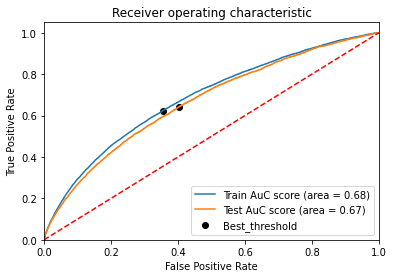

In [68]:
# Using train/test data
start = time.time()
logreg2 = LogisticRegression(C=0.5, class_weight='balanced',max_iter=2000,random_state=123)
logreg2.fit(X_train.values,y_train.values.ravel())
print('Model fit time:',time.time()-start)

# print('---------------- Test report ----------------')
# roc_auc(X_test,y_test,logreg2.predict(X_test),logreg2)
# print('---------------- Train report ----------------')
# roc_auc(X_train,y_train,logreg2.predict(X_train),logreg2)
print('Mean Train_AUC: ',roc_auc_score(y_train, logreg2.predict_proba(X_train)[:,1]))
print('Mean Test_AUC:',roc_auc_score(y_test, logreg2.predict_proba(X_test)[:,1]))
compare_train_test_AUC(X_train,y_train,X_test,y_test,logreg2)